In [2]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import os
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [3]:
project_root = os.path.abspath(os.pardir)
data_loc = os.path.join(project_root, 'data')
raw_data_loc = os.path.join(data_loc, 'raw')
loan_data = os.path.join(raw_data_loc, 'loans_income.csv')

In [4]:
loan_income_df = pd.read_csv(loan_data)
loan_income_df.describe()

,x
count,50000.00000
mean,68760.51844
std,32872.03537
min,4000.00000
25%,45000.00000
50%,62000.00000
75%,85000.00000
max,199000.00000


In [5]:
loan_income_df.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


# Sampling Data

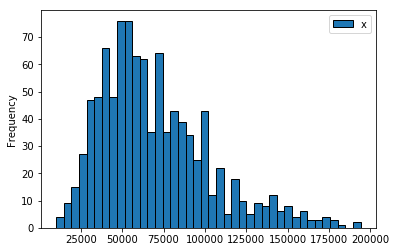

In [6]:
# Page 54 - 55
%matplotlib inline
loan_income_sample_1k_df = loan_income_df.sample(1000, random_state=np.random.RandomState())
loan_income_sample_1k_df.plot(kind='hist', edgecolor='black', bins=40);

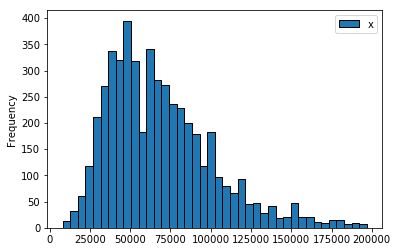

In [7]:
# This a 1000 mean calculations from 1000 random sample of 5 values
loan_income_mean_of_5 = [loan_income_df.sample(5) for i in range(1000)]
loan_income_mean_of_5_df = pd.concat(loan_income_mean_of_5)
loan_income_mean_of_5_df.plot(kind='hist', edgecolor='black', bins=40);

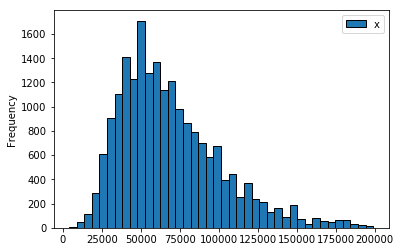

In [8]:
# This a 1000 mean calculations from 1000 random samples of 20 values
loan_income_mean_of_20 = [loan_income_df.sample(20) for i in range(1000)]
loan_income_mean_of_20_df = pd.concat(loan_income_mean_of_20)
loan_income_mean_of_20_df.plot(kind='hist', edgecolor='black', bins=40);

# Bootstrap Thoery
pg.58

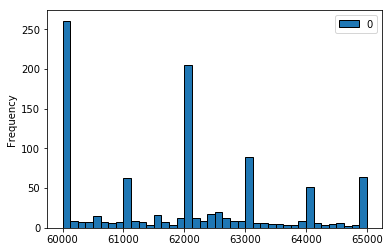

In [14]:
# Boot strap the income of people taking out loans where x is the income column
#Manual attempt, not sure this is right...
def bootstrapify(df, size, r):
    results = []
    for i in range(r):
        loan_sample = df.x.sample(n=size, replace=True, random_state=np.random.RandomState()).median()
        results.append(loan_sample)
    
    return pd.DataFrame(results)

loan_bootstrap = bootstrapify(loan_income_df, 1000, 1000)
loan_bootstrap.plot(kind='hist', bins=40, edgecolor='black');

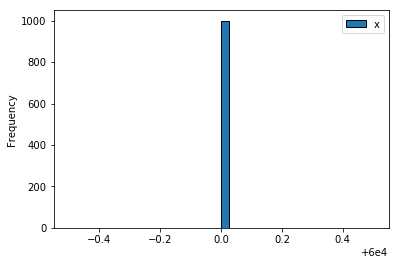

In [17]:
# Using Skikitlearn
# Right now this doesn't work
from sklearn.utils import resample

def bootstrapify2(df, size, r):
    results = []
    for i in range(r):
        loan_sample = pd.DataFrame(resample(df.x, replace=True, n_samples=size, random_state=1)).median()
        results.append(loan_sample)
        
    return pd.DataFrame(results)


loan_bootstrap_2_df = bootstrapify2(loan_income_df, 1000, 1000)
loan_bootstrap_2_df.plot(kind='hist', bins=40, edgecolor='black');

# Standard Normal and QQ Plots
Pg. 66

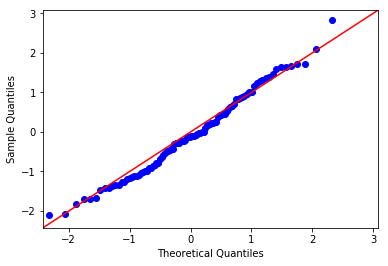

In [30]:
# Python equivalent of rnorm(100)
import statsmodels.api as sm

norm_sample = np.random.normal(size=100)
# Using a data fram is over kill...but likely the way I will be accessing data
norm_sample_df = pd.DataFrame(norm_sample)
sm.qqplot(norm_sample_df[0], line='45');

# Binomial Distribution
Pg. 73

In [34]:
# Python version of R dbinom
from scipy.stats import binom
# param x - The success, ie, the stat I am interested in.  
# param n - The number of trials
# param p - the probability of success
binom_success = binom.pmf(2, n=5, p=0.1)
print(binom_success)

0.0729


In [35]:
# Pg. 74 python version of R pbinom 
binom_success_2 = binom.cdf(2, n=5, p=0.1)
print(binom_success_2)

0.99144


# Poisson Distribution
Pg. 75

In [37]:
# R rpois
# Pg. 75
randos_poisson = np.random.poisson(size=100, lam=2)
print(randos_poisson)

[ 2  4  5  5  6  3  6  4  6  4  4  3  5  2  5  7  7  7  0  7  3  3  6  2  3
  1  3  4  4  2  5  9  3  0  5  3  8  4  4  6  4  7  4  6  4  2  6  5 10  4
  3  4  5  6 10  6  5  8  5  3  3  7  5  6  8  8  2  2  6  8  4  2  3  4  6
  2  2  4  5  4  4  4  4  5  9  4  5  5  5  3  8  3  2  6  6  6  2  7  7  4]


In [40]:
# Exponential distribution Pg.76
# in R rexp scale is called the rate
randos_expon_dist = np.random.exponential(size=100, scale=0.2)
print(randos_expon_dist)
print('The mean value is: {0}'.format(np.mean(randos_expon_dist)))

[ 0.09309301  0.25896959  0.46829635  0.60414365  0.19499258  0.19046952
  0.07629192  0.10663592  0.14720287  0.01483934  0.14065187  0.32235186
  0.18829936  0.68810235  0.32438743  0.2027522   0.29374843  0.05662107
  0.00178487  0.25909626  0.2896252   0.11288215  0.05098581  0.21119139
  0.04322895  0.16646091  0.06404714  0.01831873  0.23363187  0.01031856
  0.09521581  0.13138807  0.07940293  0.1975128   0.72791924  0.02771077
  0.22326394  0.01768207  0.053595    0.14063912  0.74759045  0.61723086
  0.32119734  0.3120287   0.0183794   0.22654816  0.22459578  0.13598783
  0.00627131  0.604802    0.41679016  0.1651057   0.22862981  0.05964382
  0.17921997  0.01046205  0.06286418  0.05622262  0.54113386  0.54985035
  0.24863341  0.00737223  0.08521386  0.01151593  0.0690659   0.03768028
  0.50032297  0.31514155  0.32402799  0.26504365  0.26108191  0.24926999
  0.51512999  0.02753241  0.00812835  0.08519225  0.38918847  0.00549593
  0.58526236  0.78075737  0.20010509  0.0776794   0

In [45]:
# Weibull Distribution
# Pg. 77
# R rweibull(100, 1.5, 5000)
from scipy.stats import weibull_min
randos_weibull_dist = np.random.weibull(1.5, size=100)
scaled_weibull_dist = [x  * 5000 for x in randos_weibull_dist]
print(scaled_weibull_dist)

[2303.0156301417946, 3939.4446692053066, 1193.5443528493781, 1948.4100978527358, 5938.8781083892154, 9351.3678568567175, 2719.5927801167513, 3878.3700371154473, 3550.2287234460878, 3667.7469219543445, 4094.9536265566971, 817.16254290772167, 7946.1719421514872, 4560.8366770533758, 4034.5104429012295, 11578.849739943429, 3074.6870965852663, 8473.330839854716, 4907.5012582093177, 4798.2991551226323, 4820.9707911291225, 8050.6918405005054, 1999.7724195248459, 1003.4503099369865, 4979.6482864597283, 4273.83699378847, 3229.2728625049681, 9396.5297397789618, 785.72377536719262, 8216.1524149955512, 5859.0620590046137, 283.37390042892736, 5738.6691602980809, 5155.865495013808, 2381.9262817767394, 7048.9081132422052, 6714.6718298798323, 3479.9807083037481, 3806.5948982556924, 1193.4236299367781, 4282.465751361281, 3531.0444506093495, 1164.3614991437184, 9045.3298145991193, 5131.9882879811648, 6102.5792561702528, 5129.7599951556313, 2015.4143227829541, 3070.518972922594, 3888.0638601205574, 10894

In [46]:
# Alternatively, use the scipy weibull_min
# R rweibull(100, 1.5, 5000)
randos_weibull_min2 = weibull_min.rvs(1.5, scale=5000, size=100)
print(randos_weibull_min2)

[  6674.47936065   1325.97002275   1726.6641918    4995.71981591
   7993.89387291   6963.68137277   2065.1195249    1606.32156414
   2776.68291356  15538.26527852  12520.29370732   4300.49170913
    825.7205553    5411.40756965   1627.37071314    364.78569266
   2684.93887861   7646.19079277   2846.42132123   6474.8446128
   4492.47411314   2331.668979     1815.29144929   2827.94023605
    745.63406229   6192.1135554    8220.89945912   3457.53963868
   2672.59590624   4970.42424761    954.0632652    3816.3071942
   7916.04519006   4982.2402154    6103.10484734   2837.04425493
   2828.36761023  17189.83641242   4515.35392064   2320.95583188
   2541.53301893   6996.91553822   6563.0854452    3545.94201465
   5077.01886654   4464.76430024    795.25318076   6187.87782758
  12185.72457531   1998.8844004    6467.59741423   1300.41601158
   1812.90010442    713.80953163   5920.31627309  12151.09828995
   3365.163606     4755.4733571    5899.51045932  12747.50449741
   1106.5400572    2140.034